In [71]:
import torch
import torchvision
from torchvision.transforms import transforms

In [73]:
#transfrom参数预处理（图像类必须使用）
# 训练集图像预处理：转 Tensor、归一化
train_transform = transforms.Compose([
                                      transforms.ToTensor(),
                                      transforms.Normalize([0.485, 0.456, 0.406],
                                                           [0.229, 0.224, 0.225])
                                     ])

# 测试集图像预处理：转 Tensor、归一化
test_transform = transforms.Compose([
                                     transforms.ToTensor(),
                                     transforms.Normalize(
                                         mean=[0.485, 0.456, 0.406], 
                                         std=[0.229, 0.224, 0.225])
                                    ])

In [75]:
#数据集准备
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=train_transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=test_transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


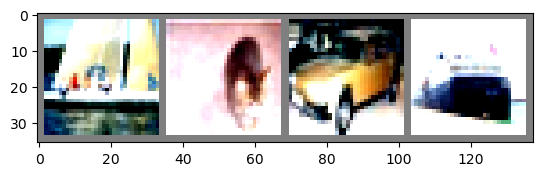

ship  cat   car   ship 


In [85]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [76]:
import torch.nn as nn
import torch.nn.functional as F
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [77]:
class Net(nn.Module):
    def __init__(self):
        super().__init__();
        self.conv1 = nn.Conv2d(3, 12, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    def forward(self ,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()  
net.to(device)

Net(
  (conv1): Conv2d(3, 12, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(12, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [81]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss() #交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9) 

In [87]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.117
[1,  4000] loss: 1.128
[1,  6000] loss: 1.128
[1,  8000] loss: 1.098
[1, 10000] loss: 1.117
[1, 12000] loss: 1.093
[2,  2000] loss: 1.019
[2,  4000] loss: 1.026
[2,  6000] loss: 1.037
[2,  8000] loss: 1.056
[2, 10000] loss: 1.008
[2, 12000] loss: 1.025
[3,  2000] loss: 0.938
[3,  4000] loss: 0.940
[3,  6000] loss: 0.979
[3,  8000] loss: 0.973
[3, 10000] loss: 0.980
[3, 12000] loss: 0.966
[4,  2000] loss: 0.893
[4,  4000] loss: 0.930
[4,  6000] loss: 0.922
[4,  8000] loss: 0.914
[4, 10000] loss: 0.942
[4, 12000] loss: 0.931
[5,  2000] loss: 0.850
[5,  4000] loss: 0.863
[5,  6000] loss: 0.877
[5,  8000] loss: 0.883
[5, 10000] loss: 0.896
[5, 12000] loss: 0.890
[6,  2000] loss: 0.813
[6,  4000] loss: 0.831
[6,  6000] loss: 0.846
[6,  8000] loss: 0.870
[6, 10000] loss: 0.890
[6, 12000] loss: 0.842
[7,  2000] loss: 0.757
[7,  4000] loss: 0.810
[7,  6000] loss: 0.829
[7,  8000] loss: 0.844
[7, 10000] loss: 0.837
[7, 12000] loss: 0.852
[8,  2000] loss: 0.752
[8,  4000] 

In [88]:
PATH = './picture_net.pth'
torch.save(net.state_dict(), PATH)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


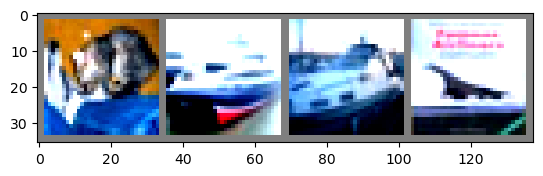

GroundTruth:  cat   ship  ship  plane


In [89]:
#测试
dataiter = iter(testloader)
images, labels = next(dataiter)

# 打印一下图片
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [90]:
#测试第一组batch
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   car   ship 


In [95]:
#测试整体测试集
correct = 0
total = 0
# 如果不需要训练则不需要grad记录
with torch.no_grad():
    for data in testloader:ArithmeticError
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs, 1) #predictions = torch.max(outputs, 1)[1]  # 只取索引部分
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 63 %


In [97]:
#测试每一个类别
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 60.5 %
Accuracy for class: car   is 86.4 %
Accuracy for class: bird  is 37.3 %
Accuracy for class: cat   is 33.1 %
Accuracy for class: deer  is 70.7 %
Accuracy for class: dog   is 54.8 %
Accuracy for class: frog  is 83.9 %
Accuracy for class: horse is 69.0 %
Accuracy for class: ship  is 62.4 %
Accuracy for class: truck is 75.4 %
